# e-Learning company

We are working for a company that provides online programming courses. Most of the courses are on web and mobile development, but there are also courses about data science, game development etc.

We want to promote our product and invest some money on marketing. As such, we want to find which are the two best markets to advertise our product in. 

Running a survey for different markets would be costly, instead we are going to look for existing data. [freeCodeCamps's 2017 New Coder Survey data](https://github.com/freeCodeCamp/2017-new-coder-survey) seems to be a good candidate for our purpouse. [freeCodeCamp](https://www.freecodecamp.org/) is a free e-leraning platform that offers course on web development. Because theyy have [a popular Medium publication](https://medium.freecodecamp.org/), they were able to attract people with different interests to the survey, which is ideal for our use case.

In [1]:
import pandas as pd
fcc= pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False)
print(fcc.shape)
fcc.head()
pd.options.mode.chained_assignment = None  # default='warn'

(18175, 136)


## Sample Representativity

As we mentioned during the introduction the company offers courses in different areas. 

Today we are mainly interested in finding information about the new coders that are interested in the areas we teach. We want to know where they are located, which ones are the locations that have the largest amount of coders, and how much money they are willing to spend on learning.

However, before we start with the analysis we need to determine if the sample data is representative of the targeted population, and if it contains the information we need for our analysis.

The `JobRoleInterest` column shows the role each participant is interested in working. Let's see what kind of roles they mention.

In [2]:
fcc["JobRoleInterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

It looks like a lot of people are interested in web development (full-stack, front-end and back-end).
A few people are interested in mobile development and others are interested in data science and other areas.

It is also interesting to mention that many respondents are interested in more than one subject. It'd be interesting to know how many people are interested in a single subject vs how many have mixed interests.

In [3]:
#Drop null values
interests_clean = fcc["JobRoleInterest"].dropna()
#Split the strings in the "JobRoleInterest" column
split_interests = interests_clean.str.split(",")
split_interests.head()

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [4]:
# Frequency table to see the number of roles selected
n_roles = split_interests.apply(lambda x: len(x))
n_roles.value_counts(normalize = True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.65% of the people have narrowed down their interests to one role. The rest have selected a wider variety of roles. Since the company offers more than one course, that might not actually be a bad thing.

Since the company focuses on web and mobile development, let's look at how many respondents are interested in those areas.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


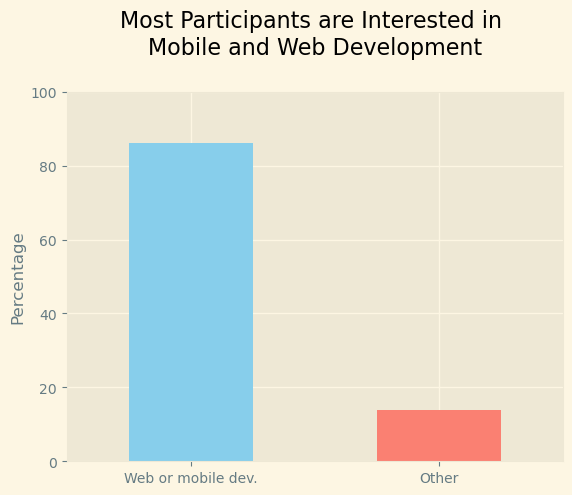

In [5]:
#Frequency table
web_or_mobile = interests_clean.str.contains("Web Developer|Mobile Developer")
freq_table = web_or_mobile.value_counts(normalize=True)*100
print(freq_table)

#Graph
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("Solarize_Light2")

freq_table.plot.bar(color = ["skyblue","salmon"])
plt.title("Most Participants are Interested in \nMobile and Web Development", y=1.08)
plt.ylabel("Percentage")
plt.xticks([0,1], ["Web or mobile dev.","Other"], rotation = 0)
plt.ylim([0,100])
plt.show()



As we can see most of the participants (around 86% of them) are interested in either web or mobile development.
These numbers give us a good reason to think that the sample of the survey it is a good representation of our population of interest.

So what are the best markets for us to invest in advertising?
- Where are the new coders located?
- What are the locations with the largest amount of new coders?
- How much money are new coders willing to spend on learning?

## New Coders' Location and Density

Let's start by looking at where are these new coders located, and how many of them are in each location. This should give us a good idea as to which are good markets to advertise on.

The dataset provides the location at a country level in the `CountryLive`column, which is what we are going to use to determine which are the best two countries to advertise in.

Let's check the frequency distribution for the countries the new coders are living in, among those that showed interest in either web or mobile development.


In [6]:
#isolate those that showed interest in web and mobile development
fcc_not_null = fcc[fcc["JobRoleInterest"].notnull()].copy()
fcc_good = fcc_not_null[fcc_not_null["JobRoleInterest"].str.contains("Web Developer| Mobile Developer")]

In [7]:
#frequency tables with absolute and relative frequencies
absolute = fcc_good["CountryLive"].value_counts()
relative = fcc_good["CountryLive"].value_counts(normalize = True)*100

#display the frequency tables
pd.DataFrame(data={"Absolute Frequency":absolute, "Percentage":relative})

,Absolute Frequency,Percentage
United States of America,2676,45.340563
India,443,7.505930
United Kingdom,281,4.761098
Canada,221,3.744493
Poland,121,2.050152
...,...,...
Qatar,1,0.016943
Aruba,1,0.016943
Trinidad & Tobago,1,0.016943
Gibraltar,1,0.016943


From the results we can see that the US is a great candidate with over 45.3% of the potential customers being located there. The second country with more density is India, but it only has a 7.5% which is not that far away from the UK (4.8%) and Canada (3.7%).

This is useful. Now we need to determine how much money people are willing to spend in each of the markets, since spending money on advertising in countries where people prefer to get the education for free, is not going to be profitable.

## Spending Money for Learning

The column named "MoneyForLearning" describes the amoung of money participants have spendt from they moment they started coding until the time of the survey in USD.

The company sells subscriptions at $59/month, meaning that it is important for us to understand how much money each student spends per month. 

We will be narrowing down the analysis to the US, India, the UK and Canada because these are the countries with the highest absolute frequencies in our sample, which means we have a good amount of data for each of them, and because our courses are written in English which is an offical language in all of these countries.

Let's start by creating a new column that tells us how much money each student has spent per month so far. To do that we will work with both the `MoneyForLearning" and the ^MonthsProgramming`columns.

We know that some students have just started learning to code, so their answer is 0 months. We can't divide by zero and have a meaningful result, so instead we are just going to substitute the 0 with a 1 in the `MonthsProgramming` column.

In [8]:
#Replace 0s with 1s to avoid the division by 0
fcc_good["MonthsProgramming"].replace(0,1, inplace = True)

#New column for the amount of money spent per month
fcc_good["MoneyPerMonth"] = fcc_good["MoneyForLearning"]/fcc_good["MonthsProgramming"]
fcc_good["MoneyPerMonth"].isnull().sum()

558

We are only going to keep those rows that don't have null values for the `MoneyPerMonth` and `CountryLive` columns.

In [9]:
fcc_good= fcc_good[fcc_good["MoneyPerMonth"].notnull()]

#Let's check if we still have enough data
fcc_good=fcc_good[fcc_good["CountryLive"].notnull()]
fcc_good["CountryLive"].value_counts().head()

United States of America    2516
India                        393
United Kingdom               247
Canada                       203
Poland                       114
Name: CountryLive, dtype: int64

This should be enough, let's see what's the average spent per student per month is in each country

In [10]:
countries_mean= fcc_good.groupby("CountryLive").mean(numeric_only = True)
countries_mean["MoneyPerMonth"][["United States of America", "India", "United Kingdom", "Canada"]]

CountryLive
United States of America    249.521492
India                       146.663700
United Kingdom               49.117435
Canada                      129.170946
Name: MoneyPerMonth, dtype: float64

It is a bit surprising that the UK and Canada are both below the average spent of India if we take into account the [GDP per capita of each country](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies).

It could be the case that the data we have for the UK and Canada is not representative enough, or that we have some outliers making the mean for India larger, or too low for the UK and Canada. Or it could simply be that the results are correct.

Let's check

## Checking for Outliers

Let's use boxplots to look for potential outliers.

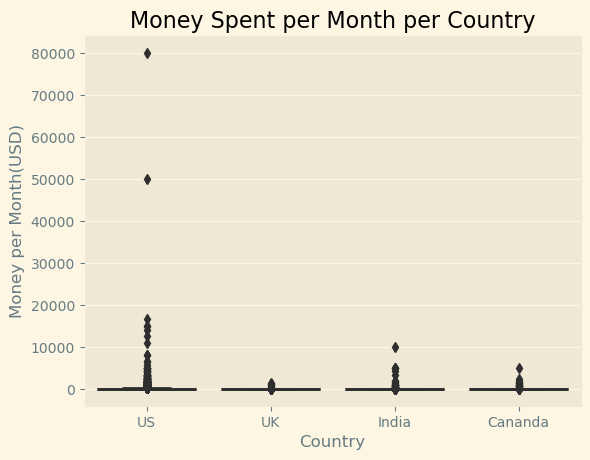

In [11]:
# Isolate the countries of interest
top_countries = fcc_good[fcc_good["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]

#Box plots to visualise the distributions
import seaborn as sns

sns.boxplot(y="MoneyPerMonth", x="CountryLive", data = top_countries)
plt.title("Money Spent per Month per Country", fontsize = 16)
plt.xlabel("Country")
plt.ylabel("Money per Month(USD)")
plt.xticks(range(4), ["US", "UK", "India", "Cananda"])
plt.show()

It looks like the US has some extreme outliers. Let's inspect those.

In [13]:
us_outliers = top_countries[(top_countries["CountryLive"] == "United States of America") & (top_countries["MoneyPerMonth"]>20000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.0


It's not imporssible that there are people spending 50K or mor for learning per month, but it is very unlikely, so we are going to remove anything that is above 20K to make the boxplot a bit more readable.

In [16]:
#Isolate the participants that spent less than 20K per month
fcc_good= fcc_good[fcc_good["MoneyPerMonth"]<20000]

In [18]:
#Let's build the boxplot again
countries_mean = fcc_good.groupby("CountryLive").mean(numeric_only=True)
countries_mean_values = countries_mean["MoneyPerMonth"][["United States of America", "India", "United Kingdom", "Canada"]]
print(countries_mean_values)

CountryLive
United States of America    198.009576
India                       146.663700
United Kingdom               49.117435
Canada                      129.170946
Name: MoneyPerMonth, dtype: float64


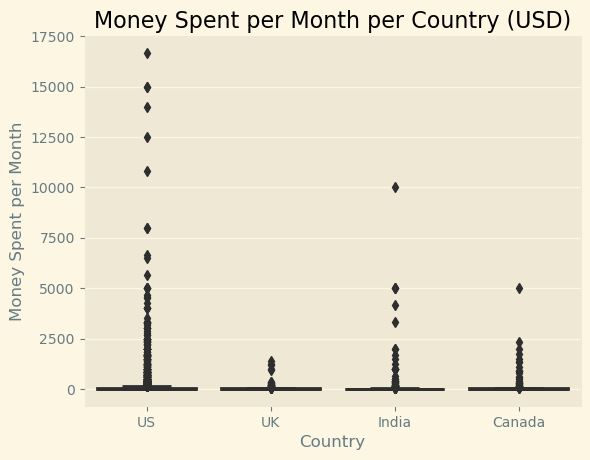

In [20]:
#Let's isolate again the countires of interest

top_countries = fcc_good[fcc_good["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]

sns.boxplot(y="MoneyPerMonth", x="CountryLive", data=top_countries)
plt.title("Money Spent per Month per Country (USD)")
plt.xlabel("Country")
plt.ylabel("Money Spent per Month")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

We can now clearly see that there are some outliers in India with over $2500, but it is still not clear if that's good data or not. It could be that these people attended several bootcamps which are pricey. Let's see what the data points tell us.

In [22]:
#Inspecting outliers in India
indian_outliers = top_countries[(top_countries["CountryLive"]== "India")& (top_countries["MoneyPerMonth"]>2500)]
indian_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It doesn't seem like these people have attended any bootcamps. It is difficult to decide if the data is accurate. The question in the survey read _"Aside from university tuition about how much money haove you spent on learning to code so far (in US dollars)?_, so maybe the question wasn't too clear, and it was misinterpreted as including university tuition?

It seems safer to remove these rows.

In [23]:
top_countries = top_countries.drop(indian_outliers.index)

We can also see that there are still some outliers in the US, those that have over $6k as an spend. Let's look at them as well.

In [24]:
us_outliers= top_countries[(top_countries["CountryLive"]=="United States of America")&(top_countries["MoneyPerMonth"]>=6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000
17231,50.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000


Out of 10, 5 people attended bootcamps, this explains the large sums of money spent on learning. For the other five, we can't determine how they have been able to spend so much money in learning, so we will also remove them.

It looks like there are also some of the bootcamp participants that have been learning how to code only for three months. That probably means that they paid a large sum of money at the beginning, and that it is also inflating the average spend per month. We will remove those as well.

In [26]:
#removing those that didn't attend bootcamps
no_bootcamp = top_countries[(top_countries["CountryLive"]=="United States of America")&
                            (top_countries["MoneyPerMonth"]>=6000)&
                            (top_countries["AttendedBootcamp"]==0)]

top_countries = top_countries.drop(no_bootcamp.index)

#removing those that had been programming for less than 3 months
less_3_months = top_countries[(top_countries["CountryLive"]=="United States of America")&
                              (top_countries["MoneyPerMonth"]>=6000)&
                              (top_countries["MonthsProgramming"]<=3)]

top_countries = top_countries.drop(less_3_months.index)

The boxplot also shows an outlier from Canada. Let's see what we can find out.

In [30]:
outlier_ca = top_countries[(top_countries["CountryLive"]=="Canada")&(top_countries["MoneyPerMonth"]>4500)]
outlier_ca

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This is the same thing that we saw with some of the US respondents. This person is attending a bootcamp but has only been stuying for two months, which means that they have paid a large sum upfront, but it is probably not reflective of the amount of money they spend per month. Let's also remove them.

In [31]:
top_countries = top_countries.drop(outlier_ca.index)

In [33]:
#Let's now calculate the means again
top_countries_mean = top_countries.groupby("CountryLive").mean(numeric_only = True)["MoneyPerMonth"]
print(top_countries_mean)

CountryLive
Canada                      105.057931
India                        64.958227
United Kingdom               49.117435
United States of America    153.605994
Name: MoneyPerMonth, dtype: float64


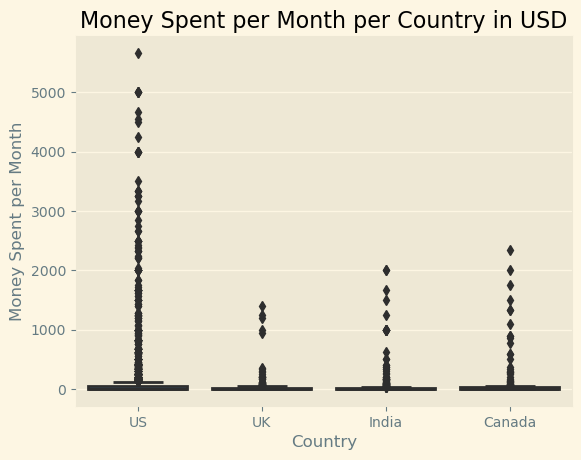

In [35]:
#Visualise the distributions

sns.boxplot(y="MoneyPerMonth", x="CountryLive", data=top_countries)
plt.title("Money Spent per Month per Country in USD")
plt.xlabel("Country")
plt.ylabel("Money Spent per Month")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

## Choosing the Two Best Markets

The US is an obvious winner. There seems to be a lot of new coders there that are willing to pay a decent amount of money at around $153/month.

Since the subscriptions that the company sell have a price of $59/month Canada seems to be the second best choice with them willing to spend $105/month, compared to India at $64 and the UK at $49.

The UK does not seem to be a good place to advertice, but would India make sense instead of Canada since we have almost twice as many potential customers in India than in Canada?

In [37]:
top_countries["CountryLive"].value_counts(normalize=True)*100

United States of America    74.970060
India                       11.586826
United Kingdom               7.395210
Canada                       6.047904
Name: CountryLive, dtype: float64

In this case India could be a good second choice over Canada even if the money per month users in India are willing to spend is lower than that of those in Canada mainly because of absolute numbers. 

At this point it looks like there are several options: 

1. Advertise in the US, India, and Canada by splitting the budget proportionatelly:
- 75% for the US, 15% for India and 10% for Canada
- 60% for the US, 25% for India and 15% for Cananda

2. Advertise only in the US and India, or the US and Canada.
- 75% for the US and 25% for India
- 70% for the US and 30% for Canada

We will let the marketing team decide the approach they want to follow based on their knowledge from the different markets. 

## Conclusion

From the data that we have analysed we can see that the US is a very good candidate, and that there could be two more interesting markets to consider, India and Canada. The final decision will be on the Marketing team hands.